# Data Exploratory Analysis (EDA)

In [7]:
# 02_eda.ipynb
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
df = pd.read_csv("../data/processed/hydraulic_cycles.csv")


## Univariate Analysis
1. Distribution of Target Variable:
Visualize class balance for `stable_flag`.

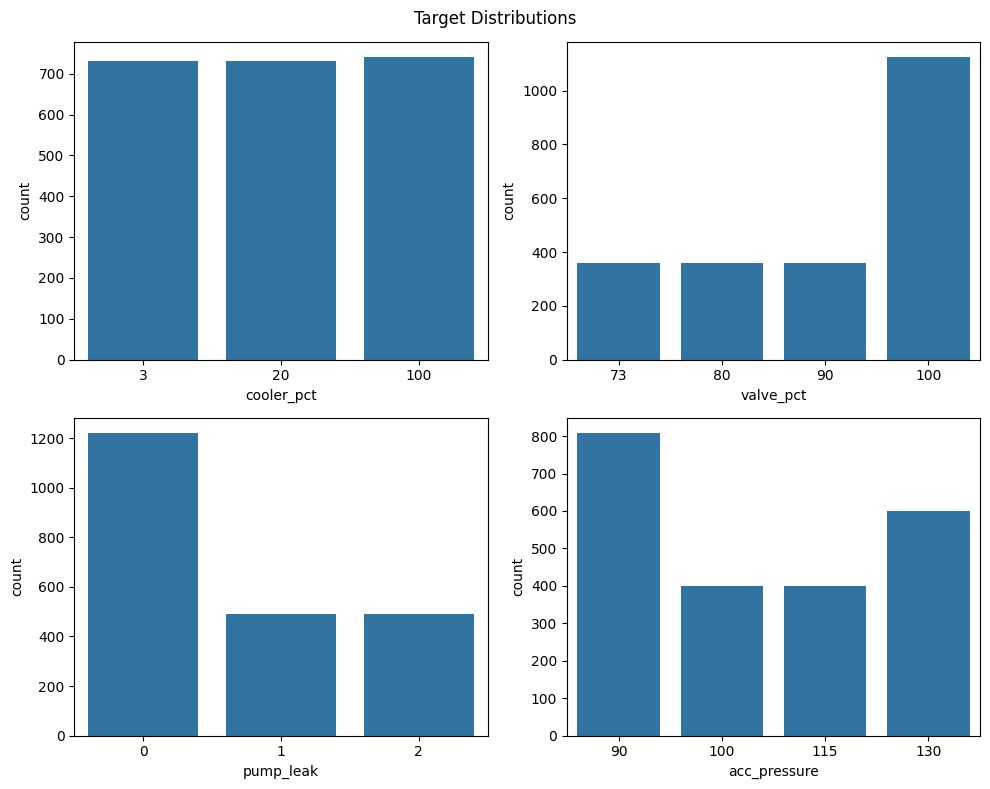

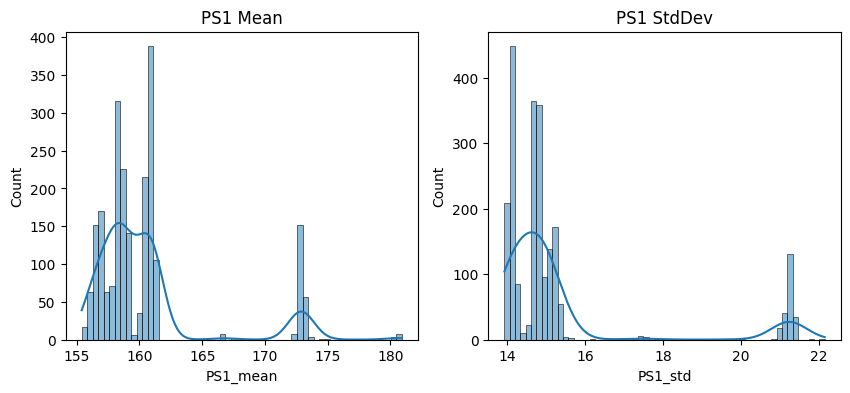

In [8]:
# --- Univariate Analysis ---

# 1. Targets
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.countplot(x="cooler_pct",    data=df, ax=ax[0,0])
sns.countplot(x="valve_pct",     data=df, ax=ax[0,1])
sns.countplot(x="pump_leak",     data=df, ax=ax[1,0])
sns.countplot(x="acc_pressure",  data=df, ax=ax[1,1])
plt.suptitle("Target Distributions")
plt.tight_layout(); plt.show()

# 2. Sensor summary (e.g. PS1_mean, PS1_std)
#   Compute for univariate insight
df["PS1_mean"] = df[[c for c in df if c.startswith("PS1_")]].mean(axis=1)
df["PS1_std"]  = df[[c for c in df if c.startswith("PS1_")]].std(axis=1)
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.histplot(df["PS1_mean"], ax=ax[0], kde=True).set_title("PS1 Mean")
sns.histplot(df["PS1_std"],  ax=ax[1], kde=True).set_title("PS1 StdDev")
plt.show()

2. Feature Distributions

## Bivariate Analysis

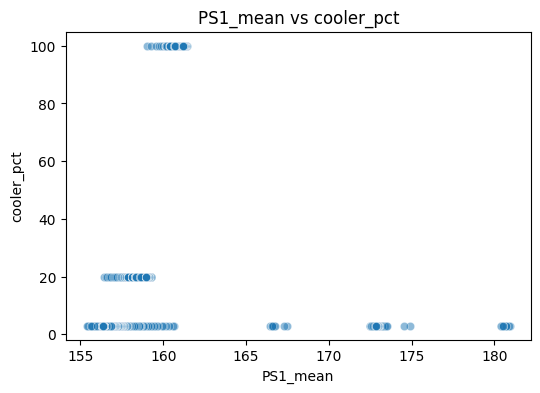

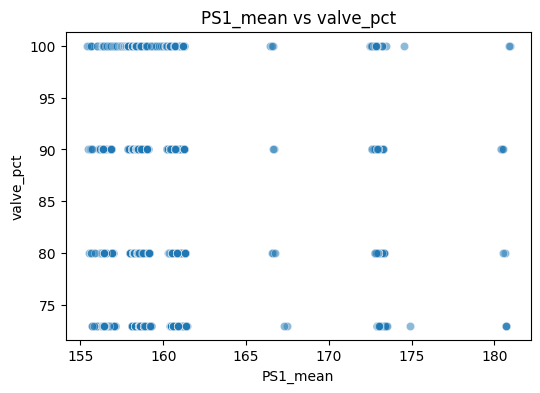

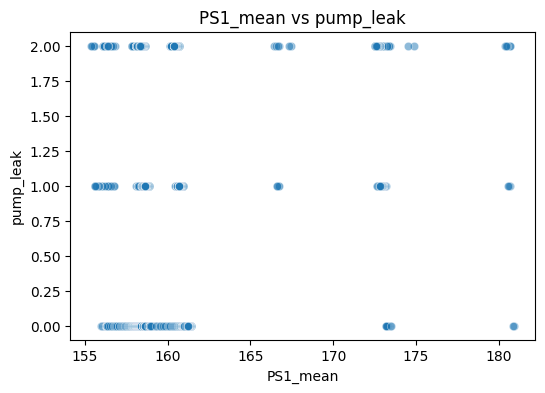

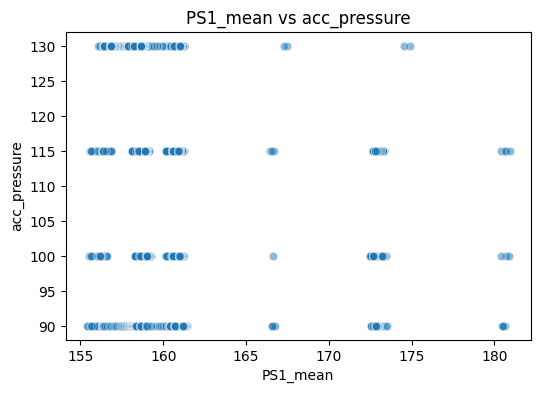

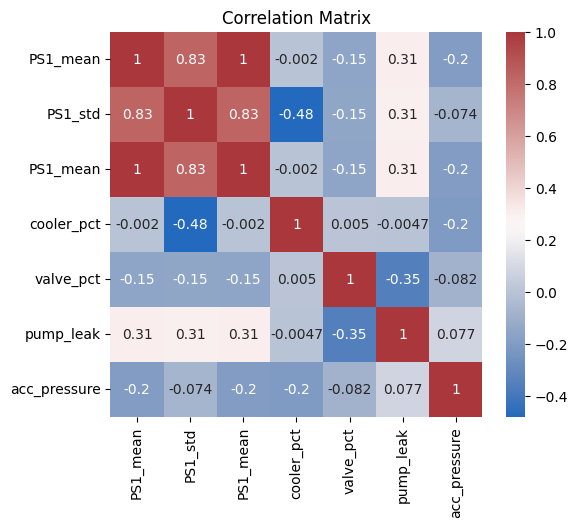

In [9]:
# --- Bivariate Analysis ---

# 3. Sensor vs. each target
for tgt in ["cooler_pct","valve_pct","pump_leak","acc_pressure"]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="PS1_mean", y=tgt, data=df, alpha=0.5)
    plt.title(f"PS1_mean vs {tgt}")
    plt.show()

# 4. Correlation heatmap between summary stats and targets
stats = df[["PS1_mean","PS1_std","PS1_mean","cooler_pct","valve_pct","pump_leak","acc_pressure"]]
corr = stats.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="vlag")
plt.title("Correlation Matrix"); plt.show()